In [2]:
import dask_ml.cluster

In [3]:
import glob

deck_names = glob.glob("processed_decks/*")
decks = []

In [4]:
for filename in deck_names:
    with open(filename,'r') as deck:
        decks.append(deck.read())

In [5]:
for i,deck in enumerate(decks):
    decks[i] = deck.split('\n')[1:]

In [6]:
for deck in decks:
    for i, card in enumerate(deck):
        quantity = int(card.split(' ')[0])
        card_name = ' '.join(card.split(' ')[1:])
        deck[i] = (quantity,card_name)

In [7]:
decks

[[(4, 'Ancient Ziggurat'),
  (4, 'Cavern of Souls'),
  (4, 'Horizon Canopy'),
  (1, 'Plains'),
  (2, 'Seachrome Coast'),
  (4, 'Unclaimed Territory'),
  (4, 'Champion of the Parish'),
  (1, 'Dark Confidant'),
  (1, 'Dire Fleet Daredevil'),
  (4, 'Kitesail Freebooter'),
  (4, 'Mantis Rider'),
  (4, 'Meddling Mage'),
  (1, 'Mirran Crusader'),
  (4, 'Noble Hierarch'),
  (3, 'Phantasmal Image'),
  (4, 'Reflector Mage'),
  (4, "Thalia\\'s Lieutenant"),
  (3, 'Thalia, Guardian of Thraben'),
  (4, 'Aether Vial')],
 [(3, 'Blackcleave Cliffs'),
  (1, 'Blood Crypt'),
  (3, 'Bloodstained Mire'),
  (2, 'Forest'),
  (1, 'Mountain'),
  (2, 'Overgrown Tomb'),
  (3, 'Raging Ravine'),
  (1, 'Stomping Ground'),
  (2, 'Swamp'),
  (1, 'Treetop Village'),
  (4, 'Verdant Catacombs'),
  (1, 'Wooded Foothills'),
  (2, 'Bloodbraid Elf'),
  (4, 'Dark Confidant'),
  (1, 'Grim Lavamancer'),
  (1, 'Kalitas, Traitor of Ghet'),
  (3, 'Scavenging Ooze'),
  (4, 'Tarmogoyf'),
  (1, 'Collective Brutality'),
  (3, 'Fatal

In [8]:
def card_names(a_deck):
    return [card[1] for card in a_deck]

In [9]:
all_card_names = []
for deck_card_names in [card_names(deck) for deck in decks]:
    all_card_names+=deck_card_names

In [10]:
len(all_card_names)

17052

In [11]:
all_card_names = set(all_card_names)

In [12]:
len(all_card_names)

642

In [13]:
 all_card_names = list(all_card_names) 

In [14]:
def deck_to_vector(deck):
    v = [0]*len(all_card_names)
    for i, name in enumerate(all_card_names):
        for number, card_name in deck:
            if card_name == name:
                v[i]+=number
    return v

In [15]:
deck_vectors = [deck_to_vector(deck) for deck in decks]

In [16]:
km = dask_ml.cluster.KMeans(n_clusters=8, oversampling_factor=5)
km.fit(deck_vectors)

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=None,
    max_iter=300, n_clusters=8, n_jobs=1, oversampling_factor=5,
    precompute_distances='auto', random_state=None, tol=0.0001)

In [17]:
km

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=None,
    max_iter=300, n_clusters=8, n_jobs=1, oversampling_factor=5,
    precompute_distances='auto', random_state=None, tol=0.0001)

In [18]:
labels = list(km.labels_.compute())

In [19]:
decks_labels = list(zip(decks,labels))

In [20]:
def most_common_cards(deck, k):
    deck.sort(key = lambda deck: deck[0], reverse=True)
    return [card[1] for card in deck[:k]]  

def decks_by_label(a_label):
    return [(deck, label) for (deck, label) in decks_labels if label == a_label]

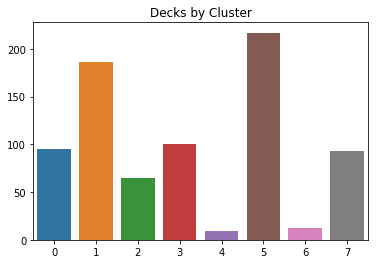

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = [(label,len(decks_by_label(label))) for label in range(8)]
counts = [count for _, count in label_counts]
points = {
    'cluster':[label for label, _ in label_counts],
    'count':[count for _, count in label_counts],
}

sns.barplot(x="cluster", y="count", data=points).set_title("Decks by Cluster")
plt.savefig('figure 1')

In [55]:
k = 40
for LABEL in range(8):
    label_set = set(most_common_cards(decks_by_label(LABEL)[0][0], k))
    for deck, label in decks_by_label(LABEL):
        label_set.intersection(set(most_common_cards(deck, k)))
    label_set = set(label_set)
    print("Cluster number {}:".format(LABEL))
    print(label_set)
    print("\n")

Cluster number 0:
{'Scavenger Grounds', 'Eternal Scourge', 'Thought-Knot Seer', 'Eldrazi Temple', 'Mutavault', 'Reality Smasher', 'Wastes', 'Blinkmoth Nexus', 'Eldrazi Mimic', 'Simian Spirit Guide', 'Matter Reshaper', 'Dismember', 'Sea Gate Wreckage', 'Chalice of the Void', 'Ghost Quarter', 'Gemstone Caverns', "Smuggler\\'s Copter", 'Serum Powder'}


Cluster number 1:
{'Scavenging Ooze', 'Liliana of the Veil', 'Forest', 'Tarmogoyf', 'Blood Crypt', 'Terminate', 'Verdant Catacombs', 'Maelstrom Pulse', 'Mountain', 'Fatal Push', 'Thoughtseize', 'Overgrown Tomb', 'Kalitas, Traitor of Ghet', "Kolaghan\\'s Command", 'Wooded Foothills', 'Dark Confidant', 'Bloodstained Mire', 'Inquisition of Kozilek', 'Grim Lavamancer', 'Treetop Village', 'Bloodbraid Elf', 'Raging Ravine', 'Collective Brutality', 'Lightning Bolt', 'Swamp', 'Stomping Ground', 'Blackcleave Cliffs', 'Liliana, the Last Hope'}


Cluster number 2:
{"Urza\\'s Mine", 'Ancient Stirrings', 'Oblivion Stone', 'Firespout', 'Forest', 'Chroma

In [22]:
k = 7
N = 10
for deck, label in decks_by_label(0)[:N]:
    print(str(most_common_cards(deck, k))+" "+ str(label))

['Blinkmoth Nexus', 'Eldrazi Temple', 'Ghost Quarter', 'Eldrazi Mimic', 'Eternal Scourge', 'Matter Reshaper', 'Reality Smasher'] 0
['Blinkmoth Nexus', 'Eldrazi Temple', 'Ghost Quarter', 'Eldrazi Mimic', 'Eternal Scourge', 'Matter Reshaper', 'Reality Smasher'] 0
['Mountain', 'Cinder Glade', 'Valakut, the Molten Pinnacle', 'Wooded Foothills', 'Bloodbraid Elf', 'Primeval Titan', 'Sakura-Tribe Elder'] 0
['Blinkmoth Nexus', 'Eldrazi Temple', 'Ghost Quarter', 'Eldrazi Mimic', 'Eternal Scourge', 'Matter Reshaper', 'Reality Smasher'] 0
['Cavern of Souls', 'Eldrazi Temple', 'Grove of the Burnwillows', 'Karplusan Forest', 'Bloodbraid Elf', 'Eldrazi Obligator', 'Matter Reshaper'] 0
['Eldrazi Temple', 'Grove of the Burnwillows', 'Karplusan Forest', 'Bloodbraid Elf', 'Eldrazi Obligator', 'Matter Reshaper', 'Noble Hierarch'] 0
['Eldrazi Temple', 'Ghost Quarter', 'Mutavault', 'Tectonic Edge', 'Eldrazi Mimic', 'Eternal Scourge', 'Matter Reshaper'] 0
['Eldrazi Temple', 'Windswept Heath', 'Drowner of Ho

In [23]:
def apparition_ratio(a_card):
    label_count = [0]*8
    for deck, label in decks_labels:
        if a_card in [card_name for _,card_name in deck]:
            label_count[label]+=1
    total_apps = sum(label_count)
    return ([count/total_apps for count in label_count],total_apps)

In [24]:
import math 

def distance(x,y):
    dist = 0.0
    for i, elem in enumerate(x):
        dist+= (elem-y[i])*(elem-y[i])
    return math.sqrt(dist)

def closest_cards(a_card, k):
    this_card = apparition_ratio(a_card)[0]
    distances = []
    for name in all_card_names:
        dist = distance(apparition_ratio(name)[0],this_card)
        distances.append((name, dist))
    distances.sort(key = lambda x: x[1])
    distances = [(name, dist) for name, dist in distances if name!=a_card]
    return [name for name,_ in distances[:k] ]

In [25]:
closest_cards("Sundering Titan",10)

['Oblivion Stone',
 'Terrarion',
 'Krark-Clan Ironworks',
 'Wurmcoil Engine',
 'Thirst for Knowledge',
 'Chromatic Sphere',
 'Myr Retriever',
 'Trinket Mage',
 'Mindslaver',
 'Commit / Memory']

In [26]:
apparition_ratio("Ratchet Bomb")

([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2)

In [27]:
def versatile_cards(k):
    variances = []
    for name in all_card_names:
        versatility = sum([1 if x > 0 else 0 for x in apparition_ratio(name)[0]])
        variances.append((name, versatility))
    variances.sort(key = lambda x: x[1], reverse=True)
    return [name for name,_ in variances[:k] ]

In [79]:
[card for card in versatile_cards(30)
 if card not in ['Island','Forest','Mountain','Swamp','Plains']]

['Dismember',
 'Ghost Quarter',
 'Field of Ruin',
 'Cavern of Souls',
 'Thoughtseize',
 'Mutavault',
 'Sacred Foundry',
 'Stomping Ground',
 'Engineered Explosives',
 'Botanical Sanctum',
 'Grove of the Burnwillows',
 'Breeding Pool',
 'Bloodbraid Elf',
 'Ancient Stirrings',
 'Collective Brutality',
 'Godless Shrine',
 'Simian Spirit Guide',
 'Misty Rainforest',
 "Smuggler\\'s Copter",
 'Tectonic Edge',
 'Lightning Bolt',
 'Chalice of the Void',
 'Snow-Covered Island',
 'Temple Garden',
 'Path to Exile']

In [56]:
apparition_ratio("Mutavault")

([0.37142857142857144,
  0.05714285714285714,
  0.0,
  0.11428571428571428,
  0.0,
  0.11428571428571428,
  0.34285714285714286,
  0.0],
 35)

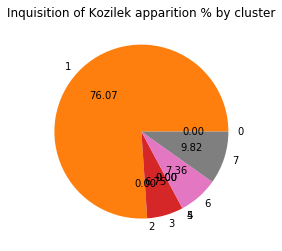

In [77]:
from matplotlib.pyplot import pie, axis, show
card_name = "Inquisition of Kozilek"
df = apparition_ratio(card_name)[0]

pie(df, labels=list(range(8)), autopct=lambda i: "{0:.2f}".format(float(i)))

plt.title(card_name + " apparition % by cluster")
plt.savefig(card_name + '_distribution')
show()

In [31]:
sum(x for x,y in decks[1])

60